In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from help_functions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# Load data from a text file
path = 'datadata.txt'
data = read_linebyline(path)
print("Number of examples after execution: ", len(data))

# Delete empty row
print("Elemet before last element in a list: ",data[len(data) - 2])
print()
print("Last and unusefull element in list is empty: ",data[len(data) - 1])
print()

data.remove(data[len(data) - 1])
m = len(data)
print("Real number of examples, m  = ", m)

Number of examples after execution:  214
Elemet before last element in a list:  65, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1,

Last and unusefull element in list is empty:  

Real number of examples, m  =  213


In [3]:
# Split data to fit vector X (m x numeber_of_atributes) and Y (m x 1)
X, Y = splitData(data)

# Explore your data
print("Shape of X = " + str(X.shape))
print("Shape of Y = " + str(Y.shape))
print()
print("First example: \nX = " + str(X[0]))
print("Output for first example X: \nY = " + str(Y[0]))
print()
print("Type of elements in numpy array is : " + str(type(X[0][0])))

Shape of X = (213, 25)
Shape of Y = (213, 1)

First example: 
X = [129.   1.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   0.   0.
   1.   0.   2.   0.   0.   0.   1.   0.   0.   3.   0.]
Output for first example X: 
Y = [1.]

Type of elements in numpy array is : <class 'numpy.float64'>


In [4]:
# Split your train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# Make valuable dimensions
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

m_train = x_train.shape[1]
m_test = x_test.shape[1]
num_attributes = x_train.shape[0]

# Explore your data
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of attributes: num_attributes = " + str(num_attributes))
print ("0utput classes = " + str(np.unique(y_train)))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))
print ("Number of all examples: " + str(m))

Number of training examples: m_train = 170
Number of testing examples: m_test = 43
Number of attributes: num_attributes = 25
0utput classes = [0. 1.]
x_train shape: (25, 170)
y_train shape: (1, 170)
x_test shape: (25, 43)
y_test shape: (1, 43)
Number of all examples: 213


In [5]:
layers_dims = [num_attributes, 100, 50, 10, 1] #  4-layer model
parameters = initialize_parameters_deep(layers_dims)
print("W1 shape= " + str(parameters["W1"].shape))
print("b1 shape= " + str(parameters["b1"].shape))
print("W2 shape= " + str(parameters["W2"].shape))
print("b2 shape= " + str(parameters["b2"].shape))
print("W3 shape= " + str(parameters["W3"].shape))
print("b3 shape= " + str(parameters["b3"].shape))
print("W4 shape= " + str(parameters["W4"].shape))
print("b4 shape= " + str(parameters["b4"].shape))

W1 shape= (100, 25)
b1 shape= (100, 1)
W2 shape= (50, 100)
b2 shape= (50, 1)
W3 shape= (10, 50)
b3 shape= (10, 1)
W4 shape= (1, 10)
b4 shape= (1, 1)


In [6]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2000, 
                  print_cost=False, init="he", reg=None):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    if init == "rand":
        parameters = initialize_parameters_deep(layers_dims)
    if init == "he":
        parameters = initialize_parameters_he(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        cost = compute_cost(AL, Y, reg)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches, reg)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Random initialization:
Cost after iteration 0: 0.693164
Cost after iteration 100: 0.685330
Cost after iteration 200: 0.679951
Cost after iteration 300: 0.676249
Cost after iteration 400: 0.673697
Cost after iteration 500: 0.671936
Cost after iteration 600: 0.670717
Cost after iteration 700: 0.669873
Cost after iteration 800: 0.669288
Cost after iteration 900: 0.668881
Cost after iteration 1000: 0.668598
Cost after iteration 1100: 0.668401
Cost after iteration 1200: 0.668263
Cost after iteration 1300: 0.668167
Cost after iteration 1400: 0.668101
Cost after iteration 1500: 0.668054
Cost after iteration 1600: 0.668021
Cost after iteration 1700: 0.667998
Cost after iteration 1800: 0.667982
Cost after iteration 1900: 0.667970
Cost after iteration 2000: 0.667962
Cost after iteration 2100: 0.667956
Cost after iteration 2200: 0.667952
Cost after iteration 2300: 0.667949
Cost after iteration 2400: 0.667947
Cost after iteration 2500: 0.667945
Cost after iteration 2600: 0.667944
Cost after iterat

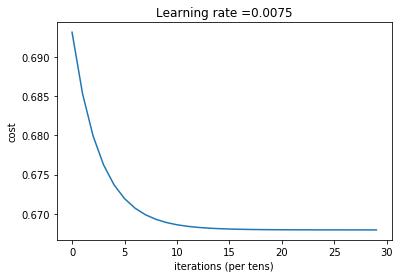

On the train set:
Accuracy: 0.6117647058823529
On the test set:
Accuracy: 0.6511627906976745


In [7]:
print ("Random initialization:")
parameters = L_layer_model(x_train, y_train, layers_dims, num_iterations = 3000, print_cost = True, init = "rand")

print ("On the train set:")
pred_train = predict(x_train, y_train, parameters)
print ("On the test set:")
pred_test = predict(x_test, y_test, parameters)

He initialization:
Cost after iteration 0: 9.542448
Cost after iteration 100: 0.629743
Cost after iteration 200: 0.620412
Cost after iteration 300: 0.609952
Cost after iteration 400: 0.597781
Cost after iteration 500: 0.583581
Cost after iteration 600: 0.567882
Cost after iteration 700: 0.553156
Cost after iteration 800: 0.538576
Cost after iteration 900: 0.528114
Cost after iteration 1000: 0.517619
Cost after iteration 1100: 0.505846
Cost after iteration 1200: 0.495840
Cost after iteration 1300: 0.485855
Cost after iteration 1400: 0.477796
Cost after iteration 1500: 0.463806
Cost after iteration 1600: 0.457934
Cost after iteration 1700: 0.444845
Cost after iteration 1800: 0.433037
Cost after iteration 1900: 0.421495
Cost after iteration 2000: 0.419423
Cost after iteration 2100: 0.410386
Cost after iteration 2200: 0.401685
Cost after iteration 2300: 0.396661
Cost after iteration 2400: 0.388429
Cost after iteration 2500: 0.385867
Cost after iteration 2600: 0.395822
Cost after iteration 

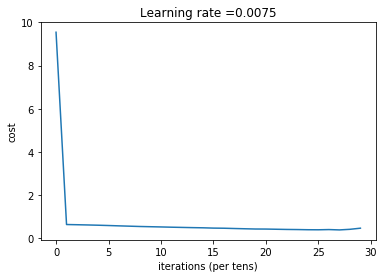

On the train set:
Accuracy: 0.8235294117647058
On the test set:
Accuracy: 0.7906976744186047


In [8]:
print ("He initialization:")
parameters = L_layer_model(x_train, y_train, layers_dims, num_iterations = 3000, print_cost = True, init = "he")
print ("On the train set:")
pred_train = predict(x_train, y_train, parameters)
print ("On the test set:")
pred_test = predict(x_test, y_test, parameters)

In [13]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 1000, print_cost = False,init="he", reg=False ):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    if init == "rand":
        parameters = initialize_parameters_deep(layers_dims)
    if init == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            AL, caches = L_model_forward(minibatch_X, parameters)

            # Compute cost
            if reg == False:
                cost = compute_cost(AL, minibatch_Y, None)
            else:
                cost = compute_cost(AL, minibatch_Y, parameters)

            # Backward propagation
            grads = L_model_backward(AL, minibatch_Y, caches, reg)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 100 epoch
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 10)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

He initialization + Minibatch Gradient Descent
Cost after epoch 0: 2.537526
Cost after epoch 100: 0.616759
Cost after epoch 200: 0.598436
Cost after epoch 300: 0.645090
Cost after epoch 400: 0.584586
Cost after epoch 500: 0.613588
Cost after epoch 600: 0.562673
Cost after epoch 700: 0.590139
Cost after epoch 800: 0.514813
Cost after epoch 900: 0.601845


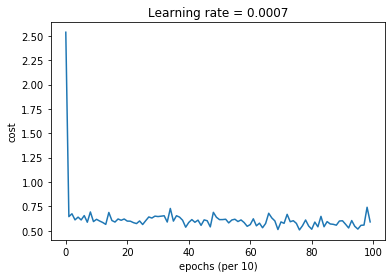

On the train set:
Accuracy: 0.7117647058823529
On the test set:
Accuracy: 0.744186046511628


In [19]:
print ("He initialization + Minibatch Gradient Descent")
# parameters = L_layer_model(x_train, y_train, layers_dims, 
# num_iterations = 3000, print_cost = True, init = "he", reg=True)
parameters = model(x_train, y_train, layers_dims, optimizer = "gd", 
                   print_cost = True, init = "he")

# Predict
print ("On the train set:")
pred_train = predict(x_train, y_train, parameters)
print ("On the test set:")
pred_test = predict(x_test, y_test, parameters)

He initialization + Momentum
Cost after epoch 0: 6.474190
Cost after epoch 100: 0.600476
Cost after epoch 200: 0.596190
Cost after epoch 300: 0.633141
Cost after epoch 400: 0.561107
Cost after epoch 500: 0.618716
Cost after epoch 600: 0.591819
Cost after epoch 700: 0.609621
Cost after epoch 800: 0.522872
Cost after epoch 900: 0.561347


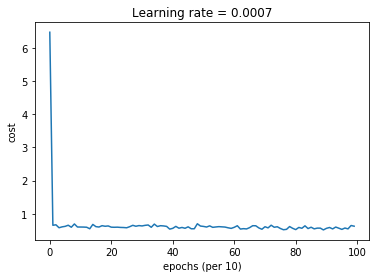

On the train set:
Accuracy: 0.7294117647058824
On the test set:
Accuracy: 0.7674418604651163


In [15]:
print ("He initialization + Momentum")
# parameters = L_layer_model(x_train, y_train, layers_dims, 
# num_iterations = 3000, print_cost = True, init = "he", reg=True)
parameters = model(x_train, y_train, layers_dims, optimizer = "momentum", 
                   print_cost = True, init = "he")

# Predict
print ("On the train set:")
pred_train = predict(x_train, y_train, parameters)
print ("On the test set:")
pred_test = predict(x_test, y_test, parameters)

He initialization + Adam optimizer
Cost after epoch 0: 5.781357
Cost after epoch 100: 0.398567
Cost after epoch 200: 0.336058
Cost after epoch 300: 0.325286
Cost after epoch 400: 0.241816
Cost after epoch 500: 0.190679
Cost after epoch 600: 0.224387
Cost after epoch 700: 0.275943
Cost after epoch 800: 0.152473
Cost after epoch 900: 0.134322


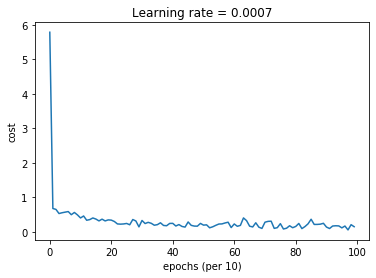

On the train set:
Accuracy: 0.9529411764705882
On the test set:
Accuracy: 0.813953488372093


In [18]:
print ("He initialization + Adam optimizer")
# parameters = L_layer_model(x_train, y_train, layers_dims, 
# num_iterations = 3000, print_cost = True, init = "he", reg=True)
parameters = model(x_train, y_train, layers_dims, optimizer = "adam", 
                   print_cost = True, init = "he")

# Predict
print ("On the train set:")
pred_train = predict(x_train, y_train, parameters)
print ("On the test set:")
pred_test = predict(x_test, y_test, parameters)